In [1]:
import pandas as pd
import os

os.getcwd()

'/Users/mc24/Documents/Python/Python-/data_vizualization'

In [3]:
movies = pd.read_csv("Movie-Ratings.csv")

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [9]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRatings',
       'BudgetMillions', 'Year']

In [10]:
movies.head()

,Film,Genre,CriticRating,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticRating       559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [12]:
movies.describe()

,CriticRating,AudienceRatings,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [14]:
movies.Film = movies.Film.astype('category')
movies.Year = movies.Year.astype('category')
movies.Genre = movies.Genre.astype('category')

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRating       559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [16]:
movies.describe()

,CriticRating,AudienceRatings,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

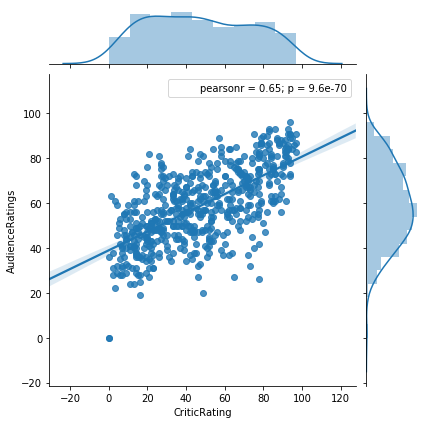

In [20]:
# Joiplots
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRatings', kind ='reg')

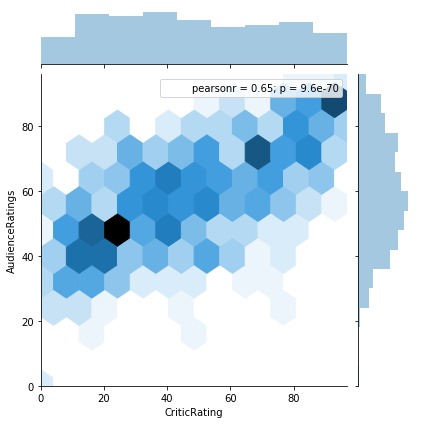

In [21]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRatings',kind ='hex')

In [23]:
## Histograms

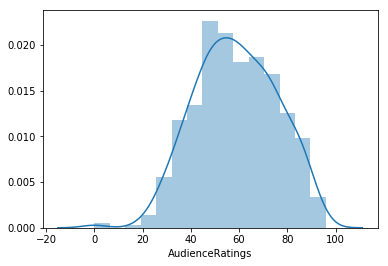

In [25]:
#seaborn
m1 = sns.distplot(movies.AudienceRatings, bins = 15)

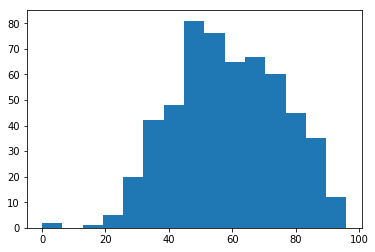

In [27]:
# pyplot
n1 = plt.hist(movies.AudienceRatings, bins = 15)

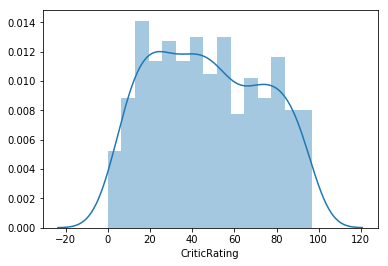

In [28]:
m2 = sns.distplot(movies.CriticRating, bins = 15)

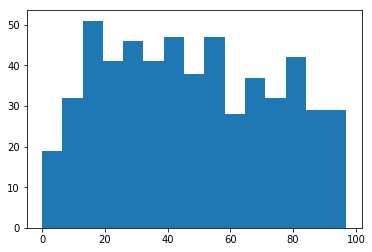

In [29]:
n2 = plt.hist(movies.CriticRating, bins = 15)

In [30]:
# Stacked Histograms

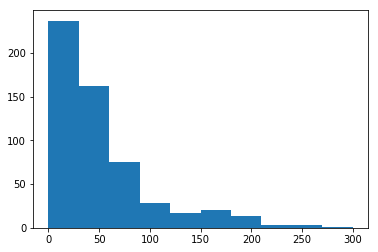

In [32]:
h1 = plt.hist(movies.BudgetMillions)
plt.show()

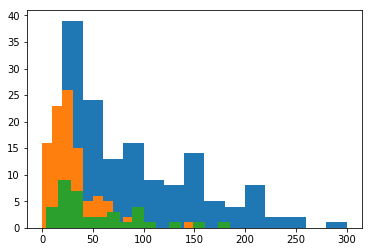

In [38]:
# filtering only movies Genre
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 15)
plt.show()

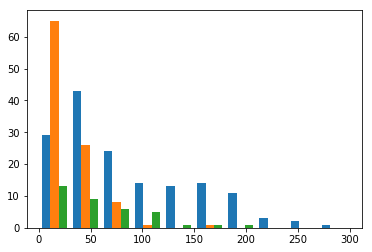

In [42]:
# making a list of items
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,\
          movies[movies.Genre == 'Drama'].BudgetMillions,\
          movies[movies.Genre == 'Thriller'].BudgetMillions])
plt.show()

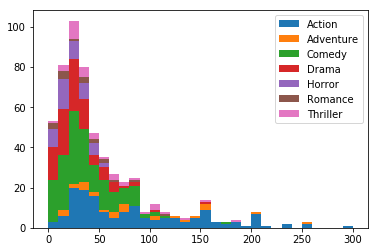

In [56]:
# loop and adding to the list
l = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    l.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
h = plt.hist(l, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()

In [57]:
#KDE Plot

In [58]:
movies.head()

,Film,Genre,CriticRating,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


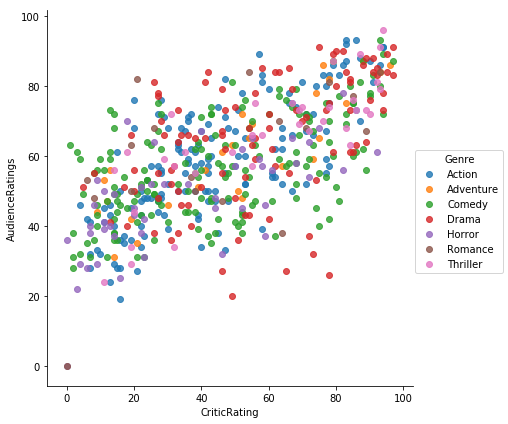

In [64]:
p = sns.lmplot(data=movies, x='CriticRating',y='AudienceRatings', fit_reg = False, hue = 'Genre', size = 6, \
                 aspect = 1)

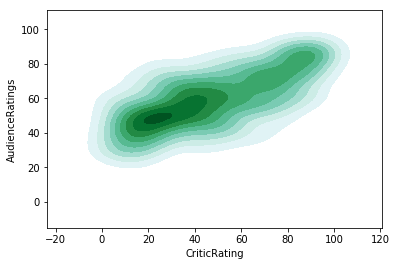

In [66]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRatings, shade = True, shade_lowest=False)

In [67]:
# Subplots 

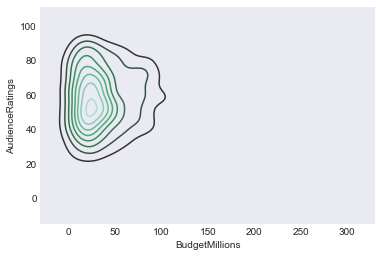

In [71]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings)

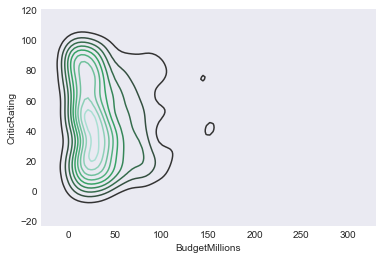

In [77]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

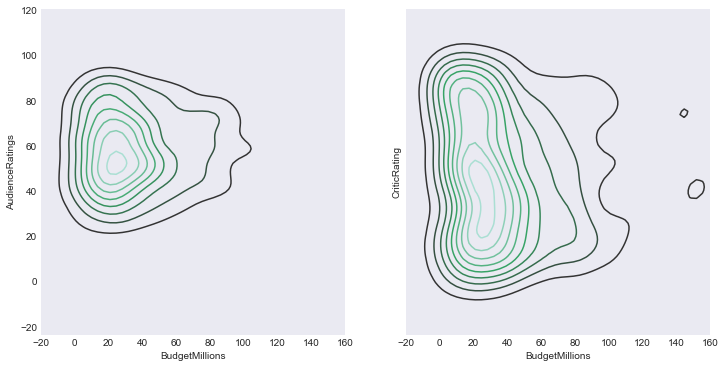

In [82]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

In [83]:
# ViolinPlots

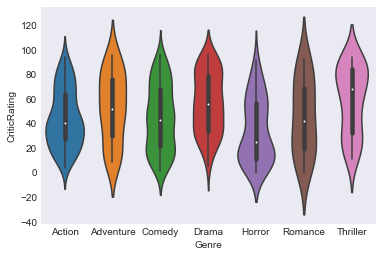

In [87]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

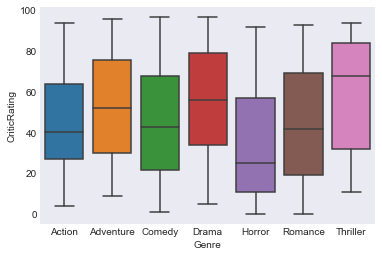

In [86]:
#box plot
z = sns.boxplot(data=movies, x='Genre', y='CriticRating')

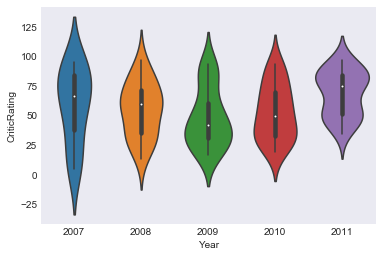

In [88]:
drama = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

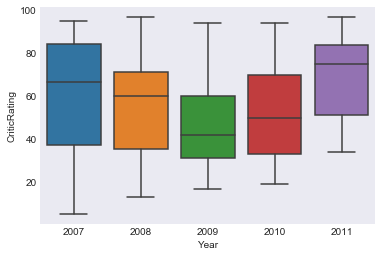

In [89]:
z = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

In [90]:
# Facet Grid

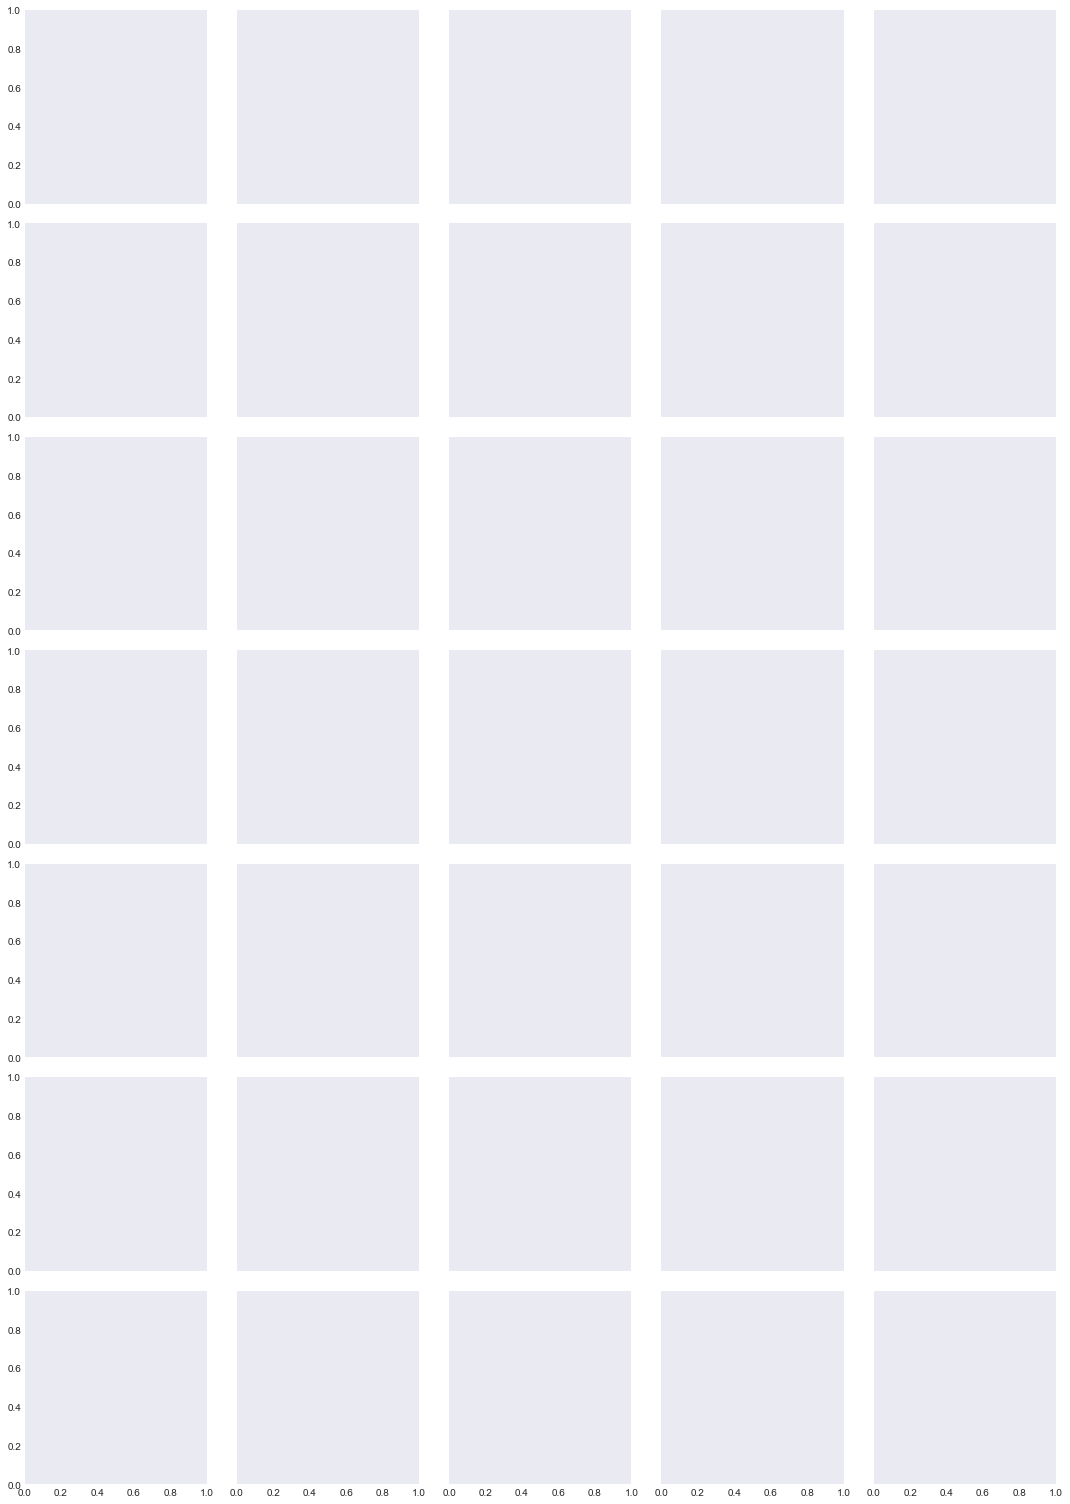

In [94]:
g = sns.FacetGrid(movies, row='Genre',col = 'Year',  hue='Genre')

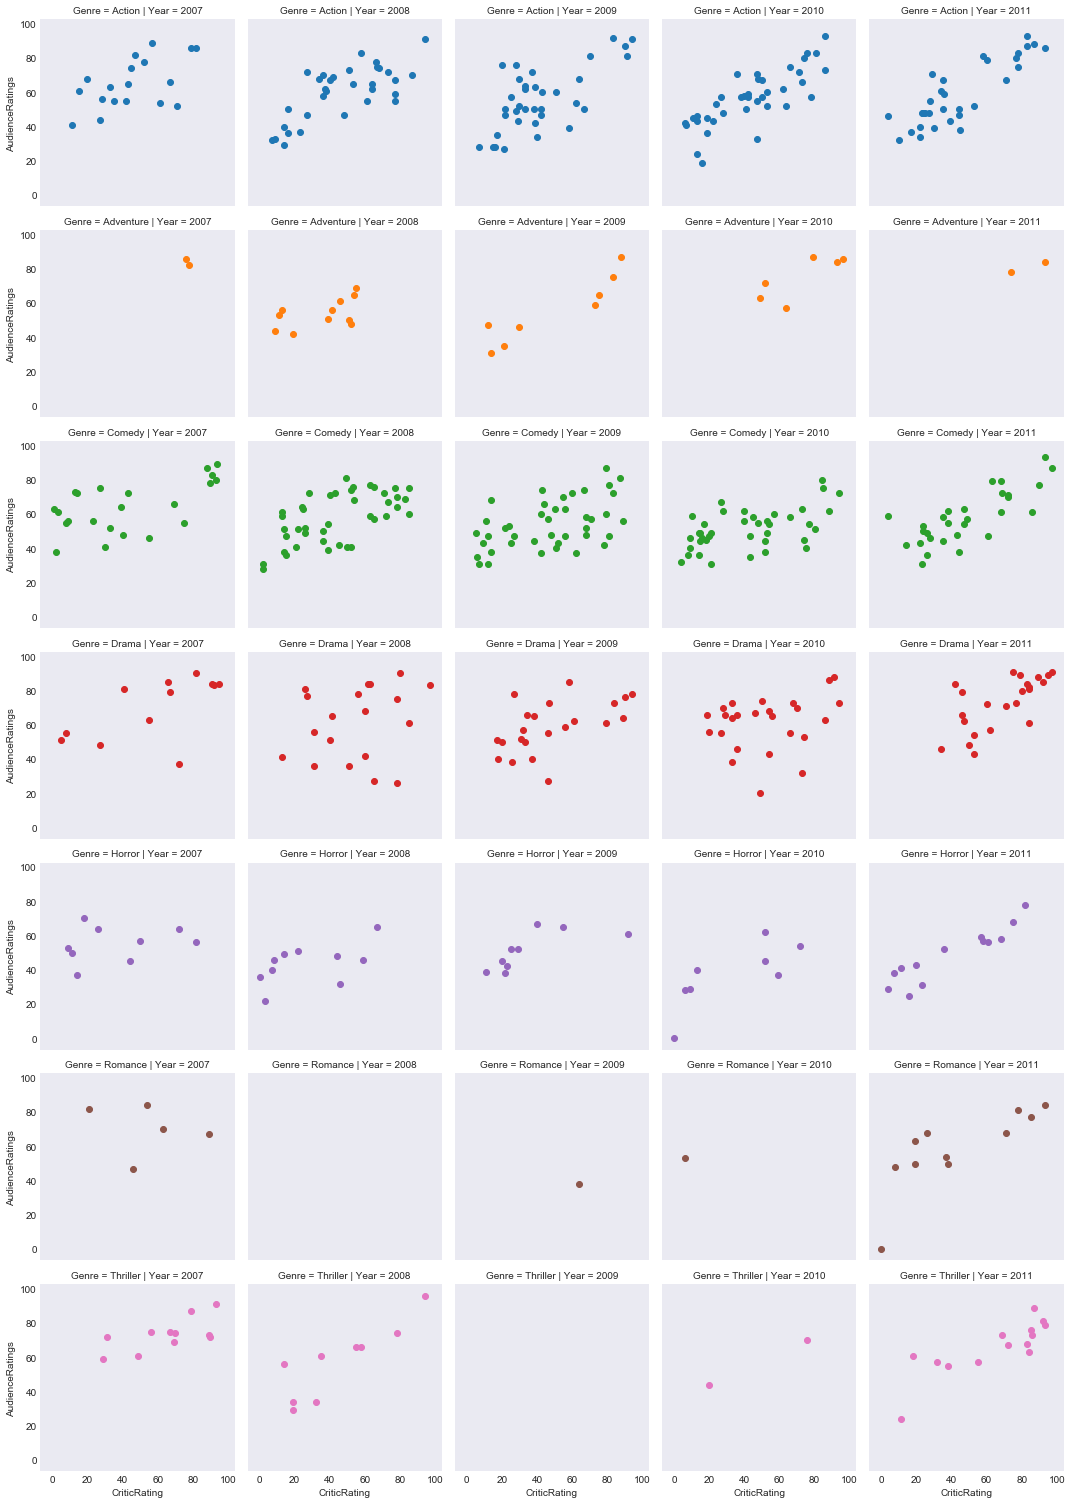

In [99]:
g = sns.FacetGrid(movies, row='Genre',col = 'Year',  hue='Genre')
g = g.map(plt.scatter, "CriticRating","AudienceRatings")

In [97]:
movies.head()

,Film,Genre,CriticRating,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


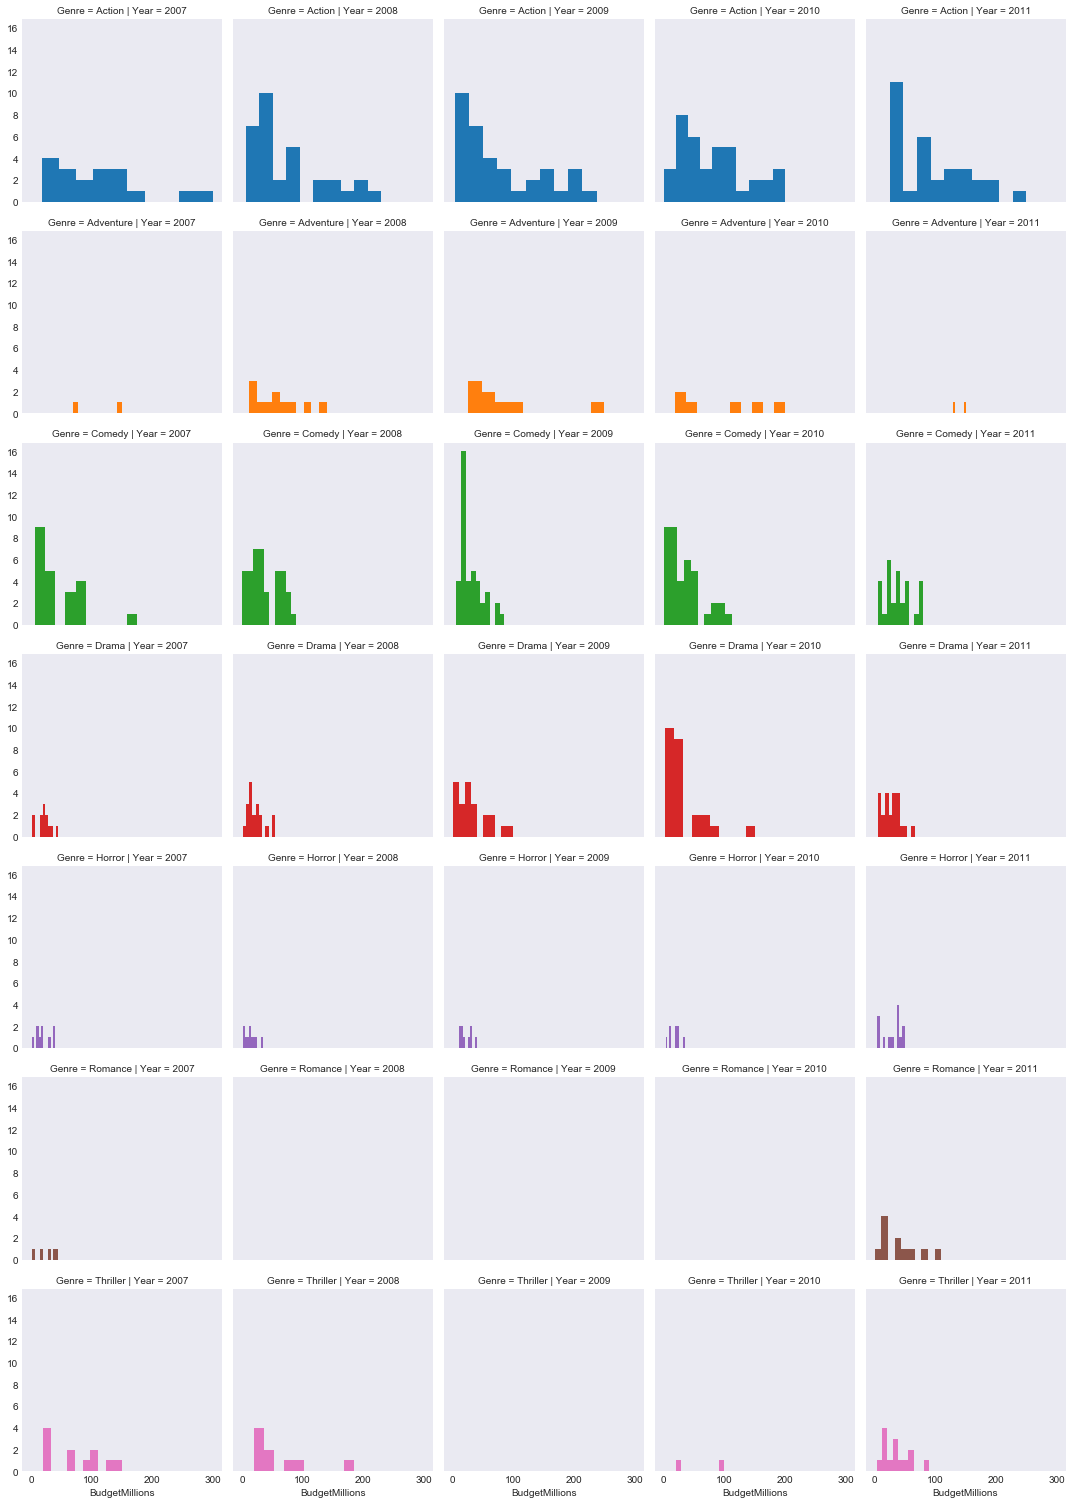

In [102]:
g = sns.FacetGrid(movies, row='Genre',col = 'Year',  hue='Genre')
g = g.map(plt.hist, "BudgetMillions")

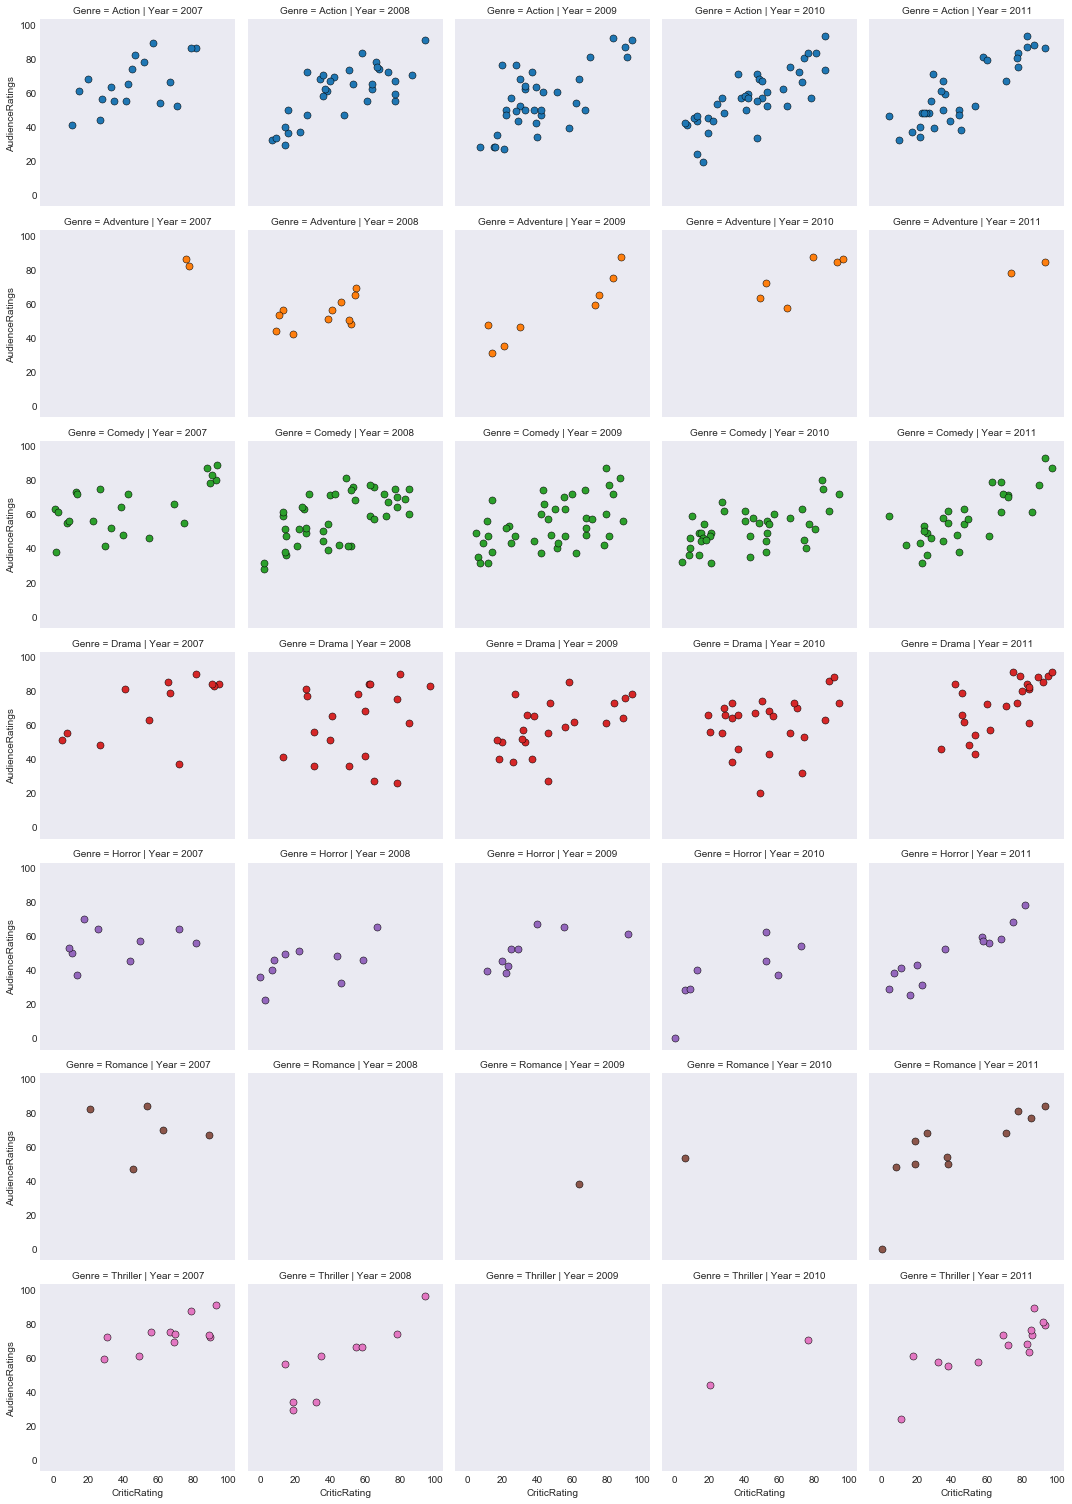

In [105]:
g = sns.FacetGrid(movies, row='Genre',col = 'Year',  hue='Genre')
kws = dict(s=50, linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter, "CriticRating","AudienceRatings", **kws)

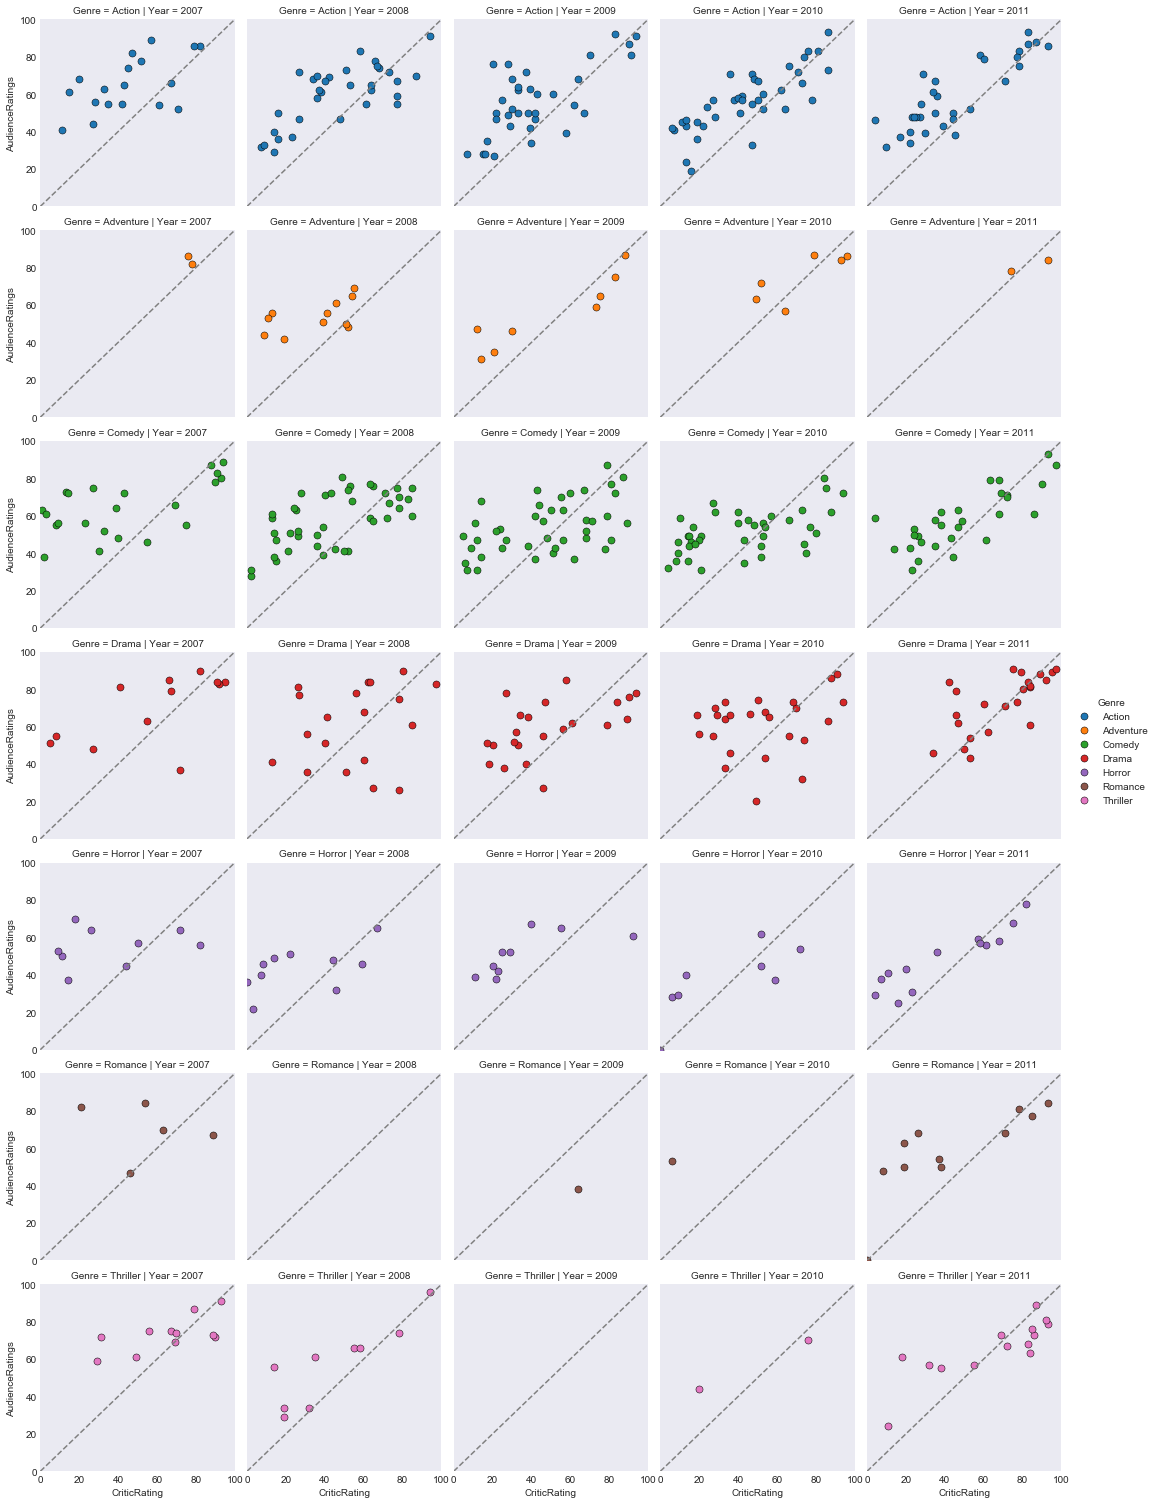

In [110]:
# diagonales
g = sns.FacetGrid(movies, row='Genre',col = 'Year',  hue='Genre')
kws = dict(s=50, linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter, "CriticRating","AudienceRatings", **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='grey', ls="--")
g.add_legend()